# Advanced Portfolio Risk Analysis: CVaR, Drawdown, Sharpe & Sortino

##  What This Notebook Covers
This notebook performs advanced risk analysis on a portfolio using historical daily returns. It includes:

- **CVaR (Conditional Value at Risk)**: Measures expected loss in the worst-case (5%) scenarios.
- **Rolling 60-day CVaR**: Shows how risk evolves over time.
- **Maximum Drawdown**: Measures the largest peak-to-trough drop in portfolio value.
- **Sharpe Ratio**: Measures risk-adjusted return using total volatility.
- **Sortino Ratio**: Measures risk-adjusted return using downside volatility only.

These metrics are crucial for evaluating not just how much return a portfolio makes, but how much risk it takes to achieve that return.

---

In [20]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Loading data
df = pd.read_csv("portfolio_daily_returns.csv",index_col='Date', parse_dates=True)
df.columns = ['Return']
returns = df['Return']
df

,Return
Date,
2022-01-04,-0.022771
2022-01-05,-0.038198
2022-01-06,-0.015505
2022-01-07,-0.010086
2022-01-10,0.009369
...,...
2024-12-24,0.029475
2024-12-26,-0.004852
2024-12-27,-0.025331


---

##  Conditional Value at Risk (CVaR)
CVaR tells you the **average of the worst-case losses**, beyond the VaR threshold. This is useful in stress scenarios.


In [22]:
def calculate_cvar(returns, confidence_level = 0.95):
    var =np.percentile(returns,(1- confidence_level)*100)
    cvar = returns[returns <= var].mean()
    return var, cvar

var_95, cvar_95 = calculate_cvar(df['Return'])
print(f"95% VaR: {var_95:.4f}, 95% CVaR: {cvar_95:.4f}")

95% VaR: -0.0326, 95% CVaR: -0.0431


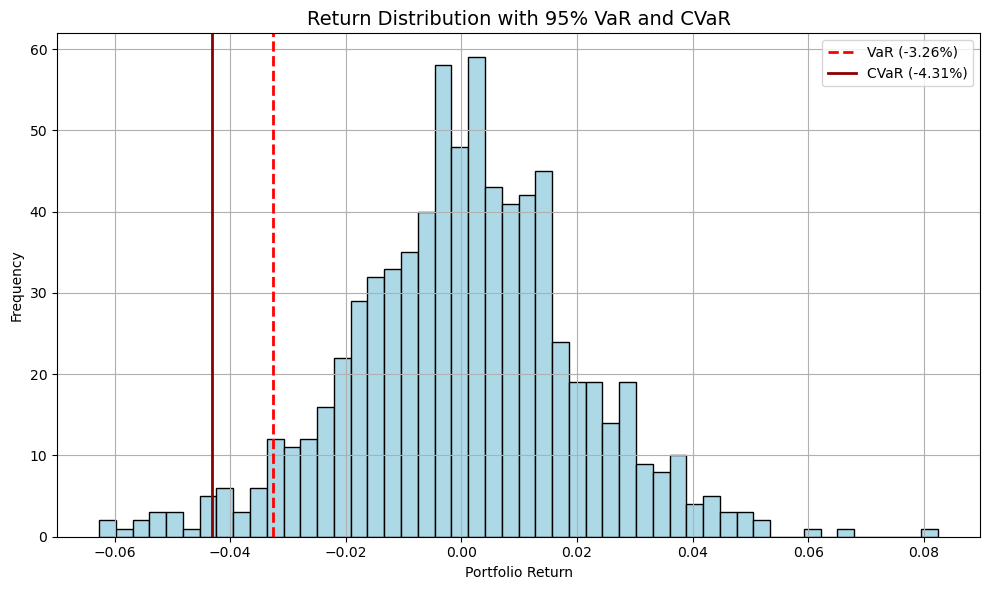

In [23]:
confidence_level = 0.95
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, color='lightblue', edgecolor='black')
plt.axvline(x=var_95, color='red', linestyle='--', linewidth=2, label=f'VaR ({var_95:.2%})')
plt.axvline(x=cvar_95, color='darkred', linestyle='-', linewidth=2, label=f'CVaR ({cvar_95:.2%})')
plt.title(f'Return Distribution with {int(confidence_level*100)}% VaR and CVaR', fontsize=14)
plt.xlabel('Portfolio Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\value_at_risk\PortfolioVaR and CVar.png', dpi=300, bbox_inches='tight')

plt.show()

---
##  Rolling 60-day CVaR Plot
This tracks the change in portfolio risk over time.

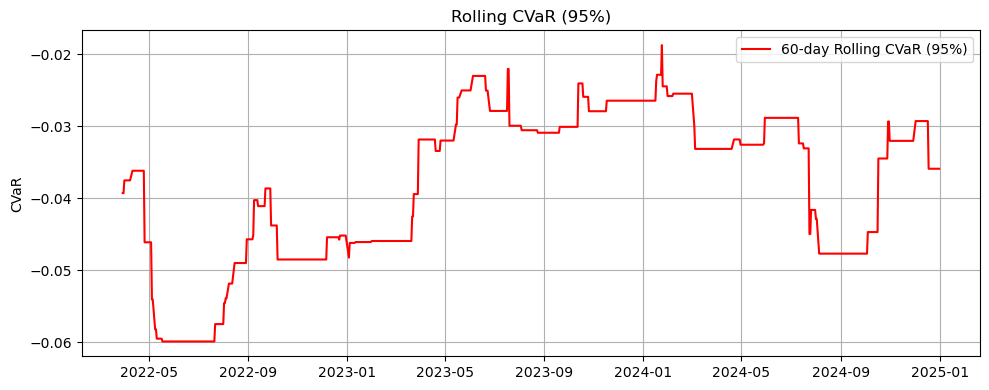

In [24]:
rolling_cvar = df['Return'].rolling(window=60).apply(lambda x: calculate_cvar(x)[1])
plt.figure(figsize=(10, 4))
plt.plot(rolling_cvar, label='60-day Rolling CVaR (95%)', color='red')
plt.title('Rolling CVaR (95%)')
plt.ylabel('CVaR')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\value_at_risk\'60-day Rolling CVaR (95%)', dpi=300, bbox_inches='tight')

plt.show()

---

##  Maximum Drawdown
This is the **worst peak-to-trough decline** in the portfolio. It reflects how painful a drop can be.

In [25]:
cumulative = (1+ df['Return']).cumprod()
rolling_max = cumulative.cummax()
drawdown = (cumulative - rolling_max) / rolling_max
max_drawdown = drawdown.min()

print(f"Maximum drawdown: {max_drawdown:.2%}")

Maximum drawdown: -44.98%


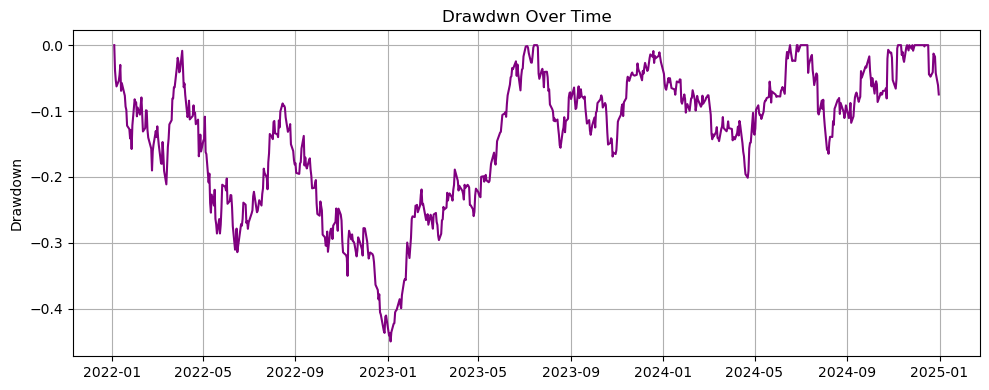

In [26]:
plt.figure(figsize=(10,4))
plt.plot(drawdown,color = 'purple')
plt.title('Drawdwn Over Time')
plt.ylabel('Drawdown')
plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\value_at_risk\drwdown)', dpi=300, bbox_inches='tight')
plt.show()

---

##  Sharpe & Sortino Ratios
These are **risk-adjusted return metrics**:
- **Sharpe Ratio**: Uses all volatility.
- **Sortino Ratio**: Focuses only on downside volatility.

Higher values mean better return per unit of risk.

In [27]:
risk_free_rate = 0.01 /252 #assuming 1% annual risk-free rate
daily_returns = df['Return']
excess_returns = daily_returns - risk_free_rate
sharpe_ratio =np.mean(excess_returns) / np.std(excess_returns)
sortino_ratio = np.mean(excess_returns) / np.std(excess_returns[excess_returns < 0])

print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")

Sharpe Ratio: 0.0290
Sortino Ratio: 0.0447


###  Interpretation of Sharpe & Sortino Ratios

> **Sharpe Ratio = 0.0290**  
> **Sortino Ratio = 0.0447**

---

####  What Does This Mean?

These values are **very low**, which suggests that:

- **portfolio’s returns are only slightly better than the risk-free rate** (e.g., government bonds).
- But we are taking on significant **volatility** (risk) for that small gain.

---

####  Sharpe Ratio (0.0290)

- This means that **for every unit of total risk**, we are earning **0.029 units of excess return** over the risk-free rate.
- Typically:
  - **> 1.0** = Acceptable
  - **> 2.0** = Good
  - **> 3.0** = Excellent  
  So **0.029 is very weak**, meaning we're **not being well-compensated for the volatility** in  portfolio.

---

####  Sortino Ratio (0.0447)

- This focuses only on **downside risk** (bad volatility).
- While it's slightly higher than the Sharpe, it's **still quite low**.
- This suggests that the portfolio **has negative swings** and **limited upside** to justify that risk.

---

###  Summary Insight

 Current portfolio might:
- Be **too volatile** for the small returns it generates
- Or simply be in a **market phase with low returns and high uncertainty**

we may want to:
- Rebalance weights
- Optimize asset allocation
- Explore better risk-adjusted return strategies
